<a href="https://colab.research.google.com/github/Annettteee/annette-colab-projects/blob/main/DelinatingDSViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

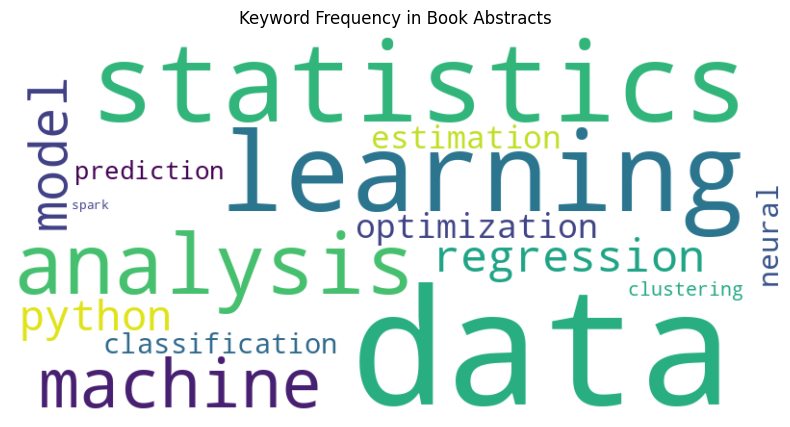

,Keyword,Book Count,Total Mentions
6,data,351,1574
7,learning,252,571
11,statistics,237,566
12,analysis,221,457
9,machine,157,276
8,model,81,150
1,regression,64,112
10,python,35,99
2,optimization,46,59
4,estimation,35,51


In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import os
from IPython.display import display

# Load the dataset
file_path = "/content/Final_Books.xlsx"
df = pd.read_excel(file_path)

# Drop rows with missing abstracts
df = df.dropna(subset=["Abstract"])

# Combine all abstracts into one text
all_abstracts = " ".join(df["Abstract"].dropna().astype(str))

# Clean the text
cleaned_text = re.sub(r'[^\w\s]', '', all_abstracts.lower())

# Tokenize and count keyword frequency
keywords = ['prediction', 'regression', 'optimization', 'clustering', 'estimation', 'classification',
            'data', 'learning', 'model', 'machine', 'python', 'statistics', 'analysis', 'spark', 'neural']
word_counts = Counter(cleaned_text.split())

keyword_freq = {key: word_counts.get(key, 0) for key in keywords}

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Frequency in Book Abstracts")
plt.show()

# Count number of books each keyword appears in
keyword_book_counts = {}
for key in keywords:
    keyword_book_counts[key] = df["Abstract"].str.contains(rf'\b{re.escape(key)}\b', case=False).sum()

# Turn this into a DataFrame for easy viewing
keyword_summary_df = pd.DataFrame(list(keyword_book_counts.items()), columns=["Keyword", "Book Count"])
keyword_summary_df["Total Mentions"] = keyword_summary_df["Keyword"].map(keyword_freq)

# Sort by frequency
keyword_summary_df = keyword_summary_df.sort_values(by="Total Mentions", ascending=False)

display(keyword_summary_df)

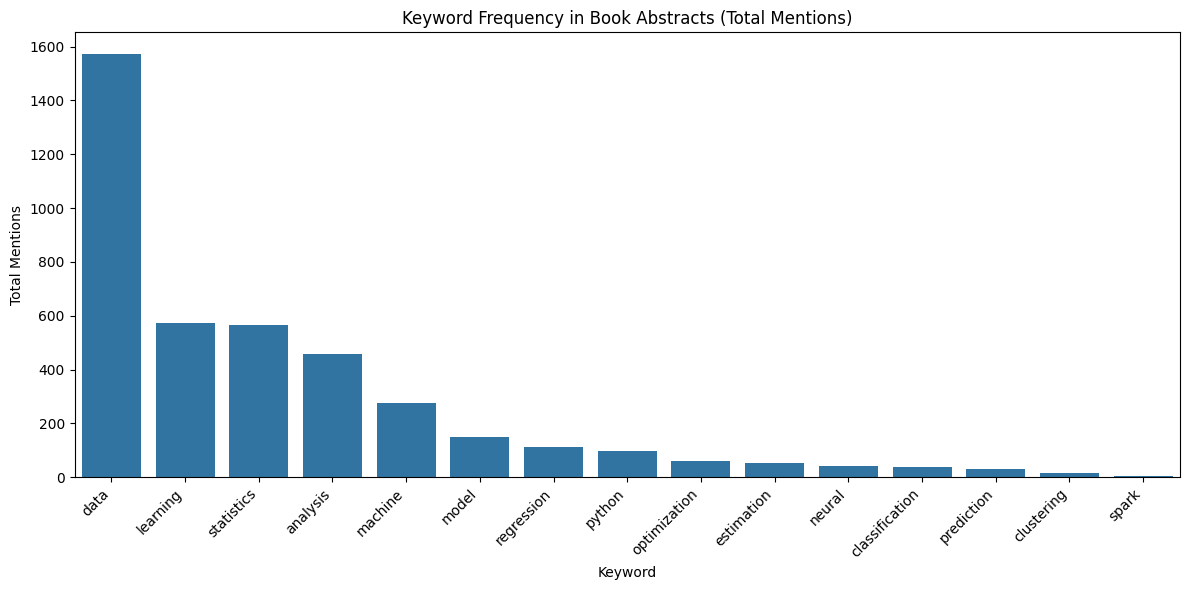

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Keyword", y="Total Mentions", data=keyword_summary_df)
plt.xticks(rotation=45, ha="right")
plt.title("Keyword Frequency in Book Abstracts (Total Mentions)")
plt.tight_layout()
plt.show()

# Task
Analyze the provided book data to identify the frequency of predefined keywords within the abstracts for each of the following subjects: 'Data Science', 'Mathematics', 'Statistics', and 'Computer Science'. Display the keyword frequencies for each subject separately.

## Define subjects

### Subtask:
Create a list of the subjects the user is interested in: 'Data Science', 'Mathematics', 'Statistics', and 'Computer Science'.


**Reasoning**:
Create a list of the target subjects as requested in the instructions.



In [ ]:
target_subjects = ['Data Science', 'Mathematics', 'Statistics', 'Computer Science']

## Process each subject

### Subtask:
Iterate through the defined subjects.


**Reasoning**:
Start a loop to iterate through the target subjects and process each subject individually.



In [ ]:
for subject in target_subjects:
    print(f"\nAnalyzing subject: {subject}")
    subject_df = df[df["Subject"] == subject].copy()

    if subject_df.empty:
        print(f"No data found for subject: {subject}")
        continue

    subject_abstracts = " ".join(subject_df["Abstract"].dropna().astype(str))
    cleaned_subject_text = re.sub(r'[^\w\s]', '', subject_abstracts.lower())

    subject_word_counts = Counter(cleaned_subject_text.split())

    subject_keyword_freq = {key: subject_word_counts.get(key, 0) for key in keywords}

    subject_keyword_summary_df = pd.DataFrame(list(subject_keyword_freq.items()), columns=["Keyword", "Total Mentions"])

    subject_keyword_summary_df = subject_keyword_summary_df.sort_values(by="Total Mentions", ascending=False)

    print(f"Keyword frequencies for {subject}:")
    display(subject_keyword_summary_df)


Analyzing subject: Data Science
Keyword frequencies for Data Science:


,Keyword,Total Mentions
6,data,1090
7,learning,227
9,machine,161
12,analysis,141
11,statistics,54
8,model,53
10,python,48
1,regression,18
5,classification,17
0,prediction,15



Analyzing subject: Mathematics
Keyword frequencies for Mathematics:


,Keyword,Total Mentions
7,learning,122
12,analysis,82
8,model,29
6,data,28
2,optimization,25
11,statistics,24
9,machine,13
10,python,7
5,classification,4
14,neural,3



Analyzing subject: Statistics
Keyword frequencies for Statistics:


,Keyword,Total Mentions
11,statistics,482
6,data,336
12,analysis,205
7,learning,128
1,regression,93
9,machine,55
4,estimation,50
8,model,46
10,python,32
5,classification,13



Analyzing subject: Computer Science
Keyword frequencies for Computer Science:


,Keyword,Total Mentions
6,data,120
7,learning,94
9,machine,47
12,analysis,29
8,model,22
14,neural,16
2,optimization,14
10,python,12
11,statistics,6
5,classification,4


**Reasoning**:
Filter the dataframe for the current subject and then process the abstracts to find keyword frequencies within that subject.



**Reasoning**:
The previous code block failed because the `continue` statement was not within the loop. I need to regenerate the entire loop with the filtering and analysis logic inside the loop.



In [ ]:
for subject in target_subjects:
    print(f"\nAnalyzing subject: {subject}")
    subject_df = df[df["Subject"] == subject].copy()

    if subject_df.empty:
        print(f"No data found for subject: {subject}")
        continue

    subject_abstracts = " ".join(subject_df["Abstract"].dropna().astype(str))
    cleaned_subject_text = re.sub(r'[^\w\s]', '', subject_abstracts.lower())

    subject_word_counts = Counter(cleaned_subject_text.split())

    subject_keyword_freq = {key: subject_word_counts.get(key, 0) for key in keywords}

    subject_keyword_summary_df = pd.DataFrame(list(subject_keyword_freq.items()), columns=["Keyword", "Total Mentions"])

    subject_keyword_summary_df = subject_keyword_summary_df.sort_values(by="Total Mentions", ascending=False)

    print(f"Keyword frequencies for {subject}:")
    display(subject_keyword_summary_df)


Analyzing subject: Data Science
Keyword frequencies for Data Science:


,Keyword,Total Mentions
6,data,1090
7,learning,227
9,machine,161
12,analysis,141
11,statistics,54
8,model,53
10,python,48
1,regression,18
5,classification,17
0,prediction,15



Analyzing subject: Mathematics
Keyword frequencies for Mathematics:


,Keyword,Total Mentions
7,learning,122
12,analysis,82
8,model,29
6,data,28
2,optimization,25
11,statistics,24
9,machine,13
10,python,7
5,classification,4
14,neural,3



Analyzing subject: Statistics
Keyword frequencies for Statistics:


,Keyword,Total Mentions
11,statistics,482
6,data,336
12,analysis,205
7,learning,128
1,regression,93
9,machine,55
4,estimation,50
8,model,46
10,python,32
5,classification,13



Analyzing subject: Computer Science
Keyword frequencies for Computer Science:


,Keyword,Total Mentions
6,data,120
7,learning,94
9,machine,47
12,analysis,29
8,model,22
14,neural,16
2,optimization,14
10,python,12
11,statistics,6
5,classification,4



Visualizing keyword frequencies for Data Science:


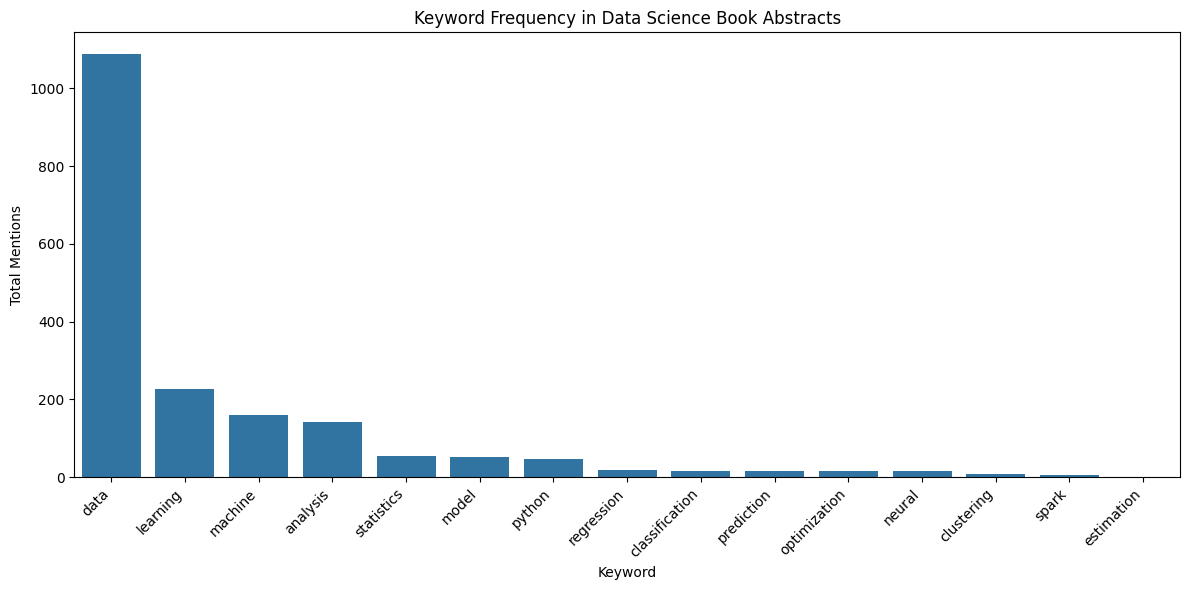


Visualizing keyword frequencies for Mathematics:


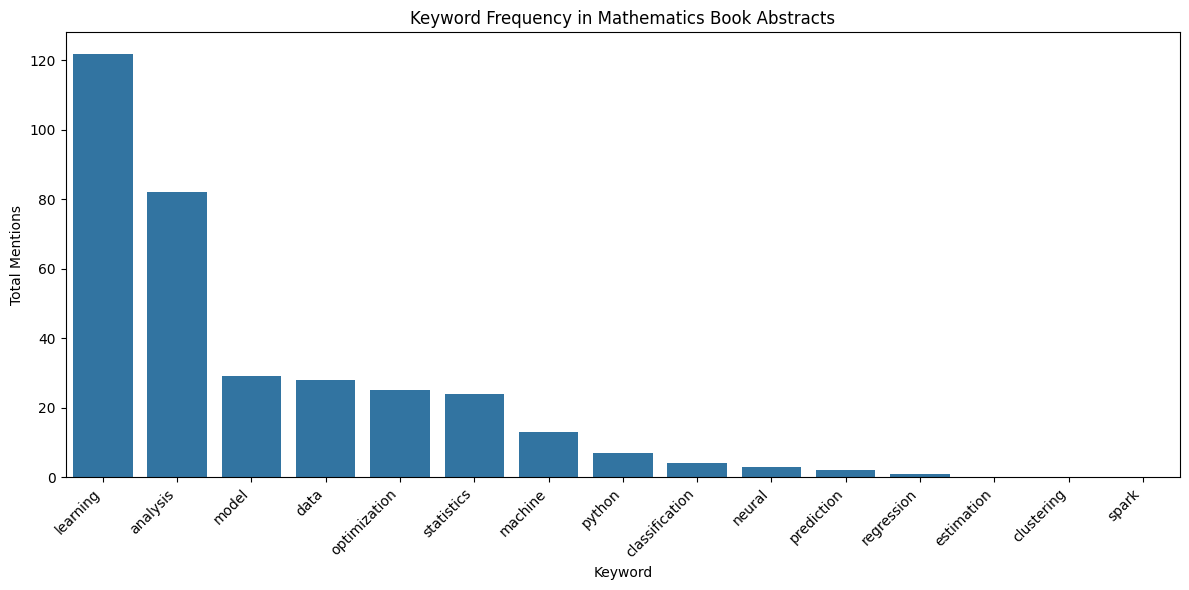


Visualizing keyword frequencies for Statistics:


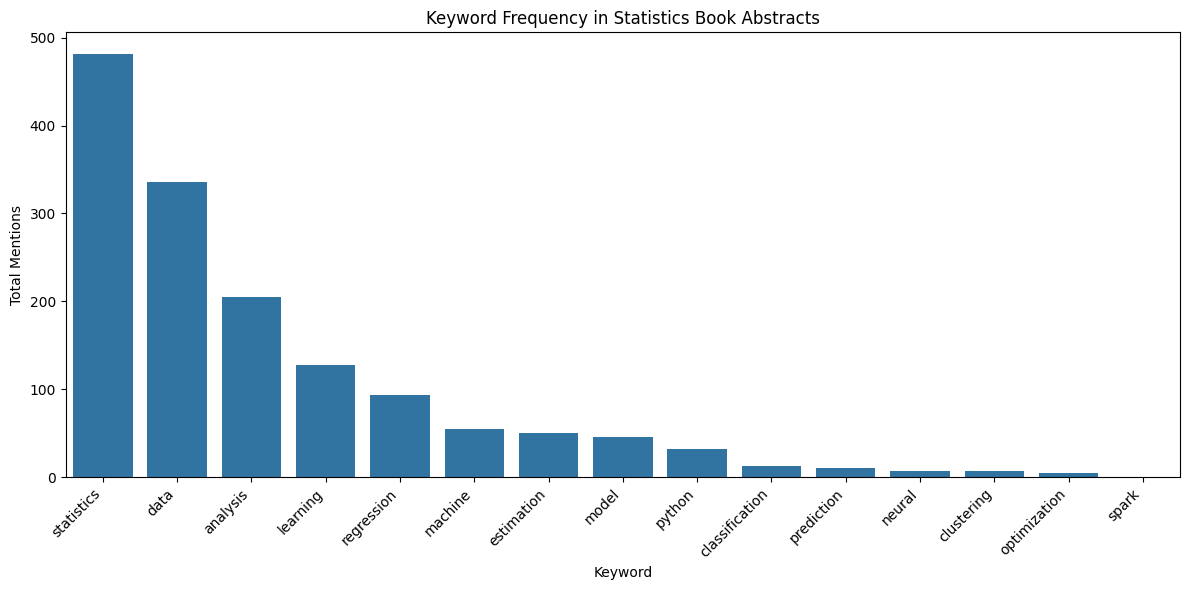


Visualizing keyword frequencies for Computer Science:


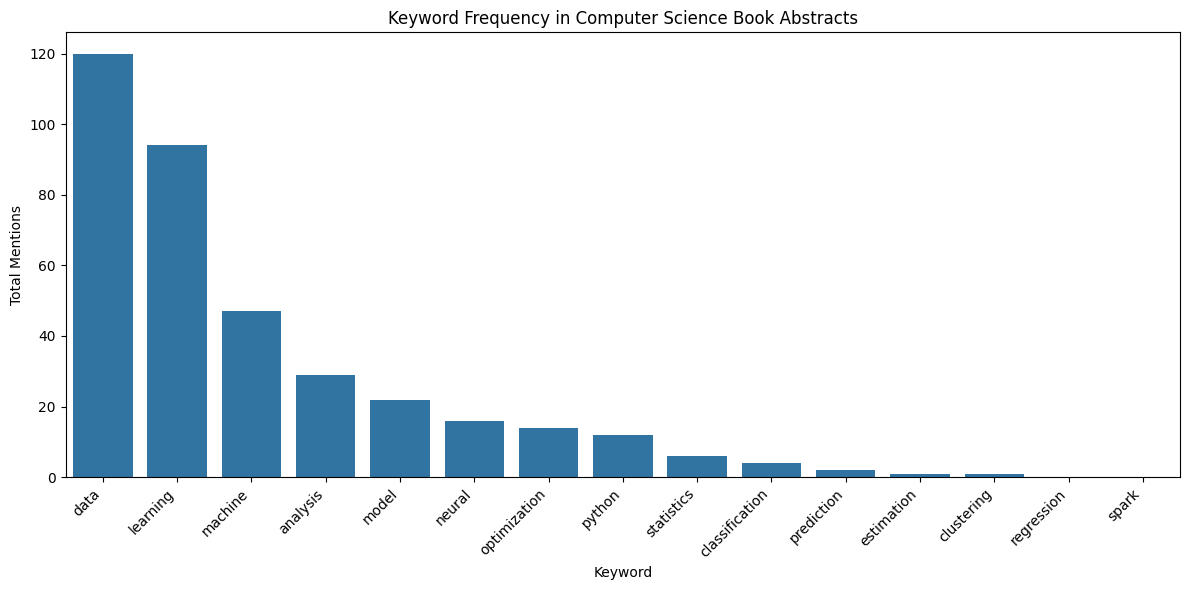

In [ ]:
for subject in target_subjects:
    print(f"\nVisualizing keyword frequencies for {subject}:")
    subject_df = df[df["Subject"] == subject].copy()

    if subject_df.empty:
        print(f"No data found for subject: {subject}")
        continue

    subject_abstracts = " ".join(subject_df["Abstract"].dropna().astype(str))
    cleaned_subject_text = re.sub(r'[^\w\s]', '', subject_abstracts.lower())

    subject_word_counts = Counter(cleaned_subject_text.split())

    subject_keyword_freq = {key: subject_word_counts.get(key, 0) for key in keywords}

    subject_keyword_summary_df = pd.DataFrame(list(subject_keyword_freq.items()), columns=["Keyword", "Total Mentions"])

    subject_keyword_summary_df = subject_keyword_summary_df.sort_values(by="Total Mentions", ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x="Keyword", y="Total Mentions", data=subject_keyword_summary_df)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Keyword Frequency in {subject} Book Abstracts")
    plt.tight_layout()
    plt.show()

Based on the analysis and visualizations of keyword frequencies in the book abstracts for 'Data Science', 'Mathematics', 'Statistics', and 'Computer Science', here are some key findings:

Overall Keyword Frequency: The initial analysis of all abstracts shows that 'data', 'learning', and 'statistics' are the most frequent keywords.
Subject-Specific Differences: The keyword frequencies vary significantly across subjects:
Data Science: 'data', 'learning', and 'machine' are the most prominent keywords, which aligns with the core concepts of this field.
Mathematics: 'learning', 'analysis', and 'model' appear more frequently than other keywords, reflecting the theoretical and modeling aspects of mathematics.
Statistics: As expected, 'statistics' is the most frequent keyword, followed by 'data' and 'analysis', highlighting the focus on data-driven analysis and statistical methods.
Computer Science: 'data', 'learning', and 'machine' are the most frequent keywords, suggesting an overlap with data science and machine learning concepts within computer science literature. The overall keyword counts are lower in Computer Science compared to other subjects, which might indicate a broader range of terminology used in this field beyond the defined keywords.
This analysis provides insights into the prominent themes and concepts discussed in book abstracts within these specific subjects based on the predefined keywords.

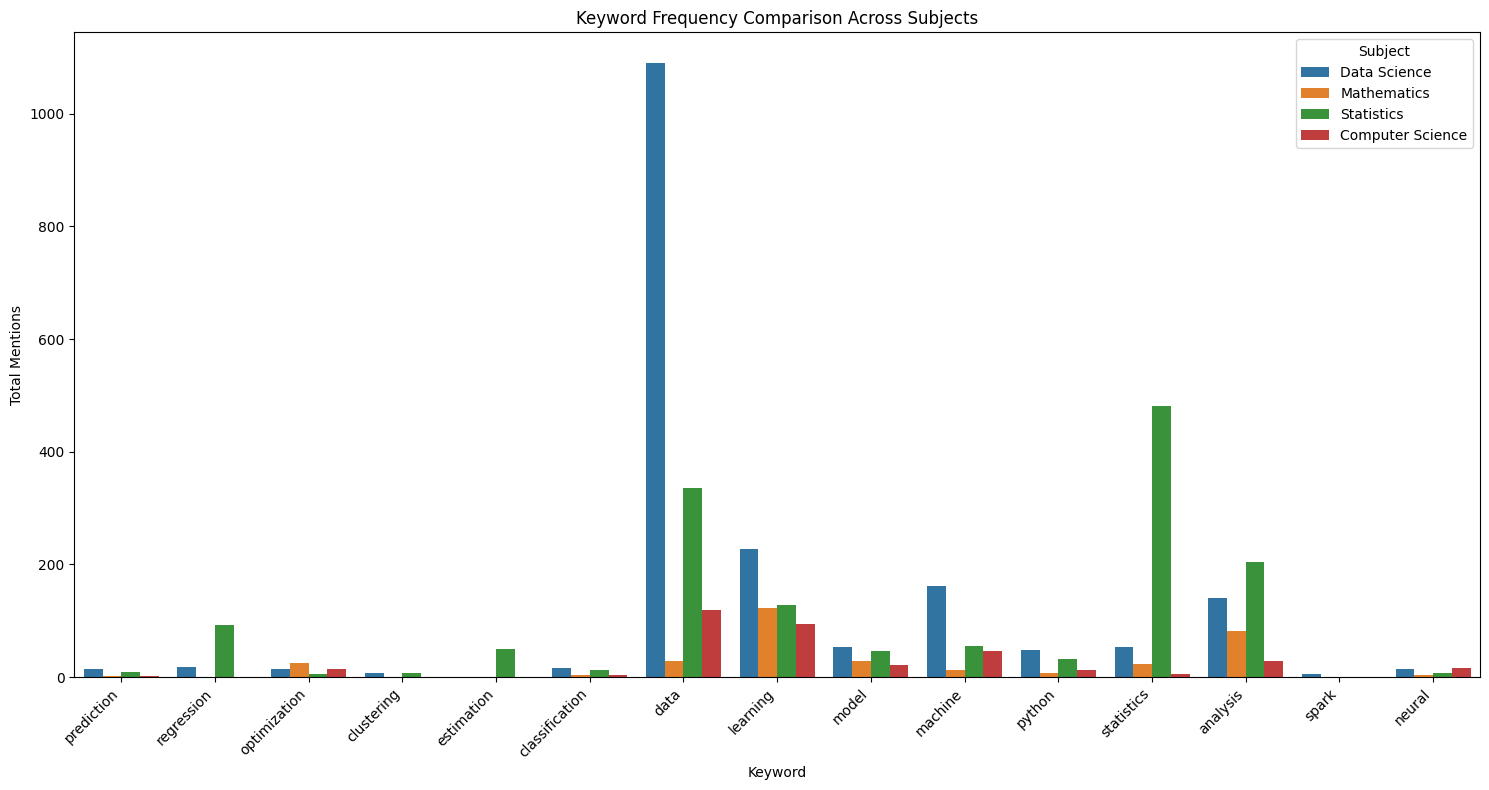

In [ ]:
# prompt: create a single barchart and compare wrods by the four subjects

# Prepare data for combined plotting
all_subject_keyword_freq = []
for subject in target_subjects:
    subject_df = df[df["Subject"] == subject].copy()

    if subject_df.empty:
        continue

    subject_abstracts = " ".join(subject_df["Abstract"].dropna().astype(str))
    cleaned_subject_text = re.sub(r'[^\w\s]', '', subject_abstracts.lower())

    subject_word_counts = Counter(cleaned_subject_text.split())

    subject_keyword_freq = {key: subject_word_counts.get(key, 0) for key in keywords}
    subject_keyword_summary_df = pd.DataFrame(list(subject_keyword_freq.items()), columns=["Keyword", "Total Mentions"])
    subject_keyword_summary_df["Subject"] = subject
    all_subject_keyword_freq.append(subject_keyword_summary_df)

combined_keyword_freq_df = pd.concat(all_subject_keyword_freq)

# Create a single bar chart comparing keyword frequencies across subjects
plt.figure(figsize=(15, 8))
sns.barplot(x="Keyword", y="Total Mentions", hue="Subject", data=combined_keyword_freq_df)
plt.xticks(rotation=45, ha="right")
plt.title("Keyword Frequency Comparison Across Subjects")
plt.ylabel("Total Mentions")
plt.xlabel("Keyword")
plt.legend(title="Subject")
plt.tight_layout()
plt.show()


Analyzing keyword co-occurrence for subject: Data Science
Keyword co-occurrence matrix for Data Science:


,prediction,regression,optimization,clustering,estimation,classification,data,learning,model,machine,python,statistics,analysis,spark,neural
prediction,0,3,2,0,0,3,83,12,15,12,8,4,18,0,2
regression,3,0,6,5,0,14,146,92,41,62,26,11,86,1,10
optimization,2,6,0,2,0,9,131,45,16,30,2,6,43,0,7
clustering,0,5,2,0,0,5,61,23,4,15,7,1,11,1,1
estimation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
classification,3,14,9,5,0,0,127,85,32,53,13,4,61,2,9
data,83,146,131,61,0,127,0,2079,442,1535,522,412,1293,49,98
learning,12,92,45,23,0,85,2079,0,249,760,159,76,436,17,63
model,15,41,16,4,0,32,442,249,0,172,31,18,141,5,24
machine,12,62,30,15,0,53,1535,760,172,0,128,59,296,13,39


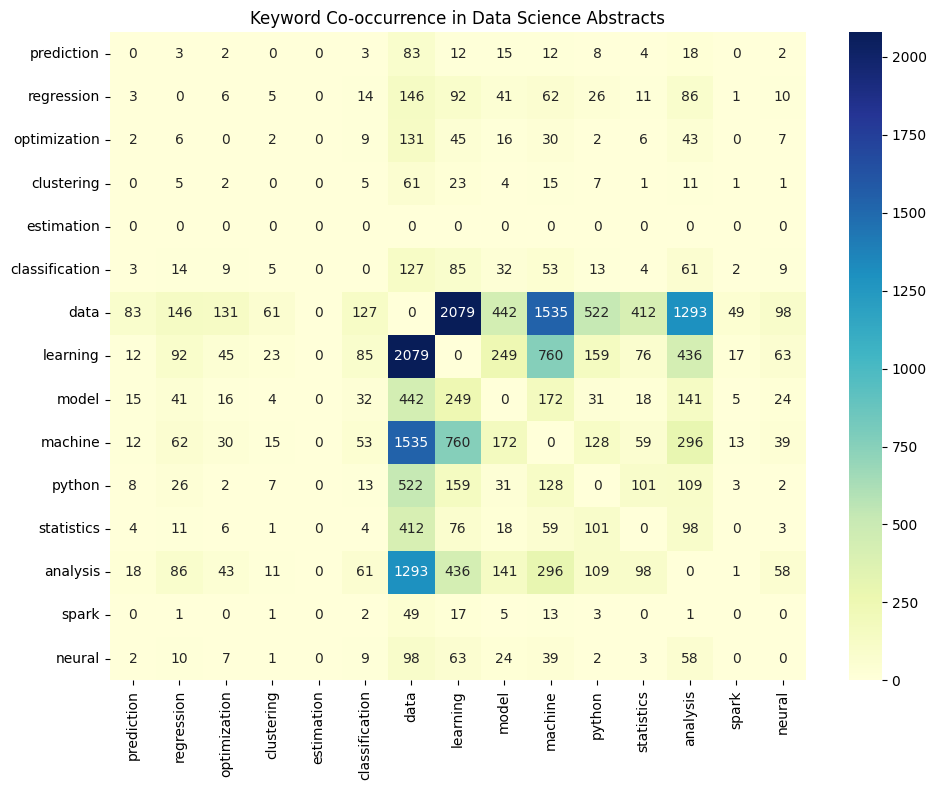


Analyzing keyword co-occurrence for subject: Mathematics
Keyword co-occurrence matrix for Mathematics:


,prediction,regression,optimization,clustering,estimation,classification,data,learning,model,machine,python,statistics,analysis,spark,neural
prediction,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
regression,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0
optimization,0,0,0,0,0,0,11,7,2,3,0,4,11,0,0
clustering,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
estimation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
classification,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
data,0,1,11,0,0,0,0,11,8,3,0,5,11,0,0
learning,0,0,7,0,0,0,11,0,0,16,1,1,28,0,1
model,0,0,2,0,0,0,8,0,0,0,0,5,17,0,0
machine,0,0,3,0,0,0,3,16,0,0,0,0,12,0,0


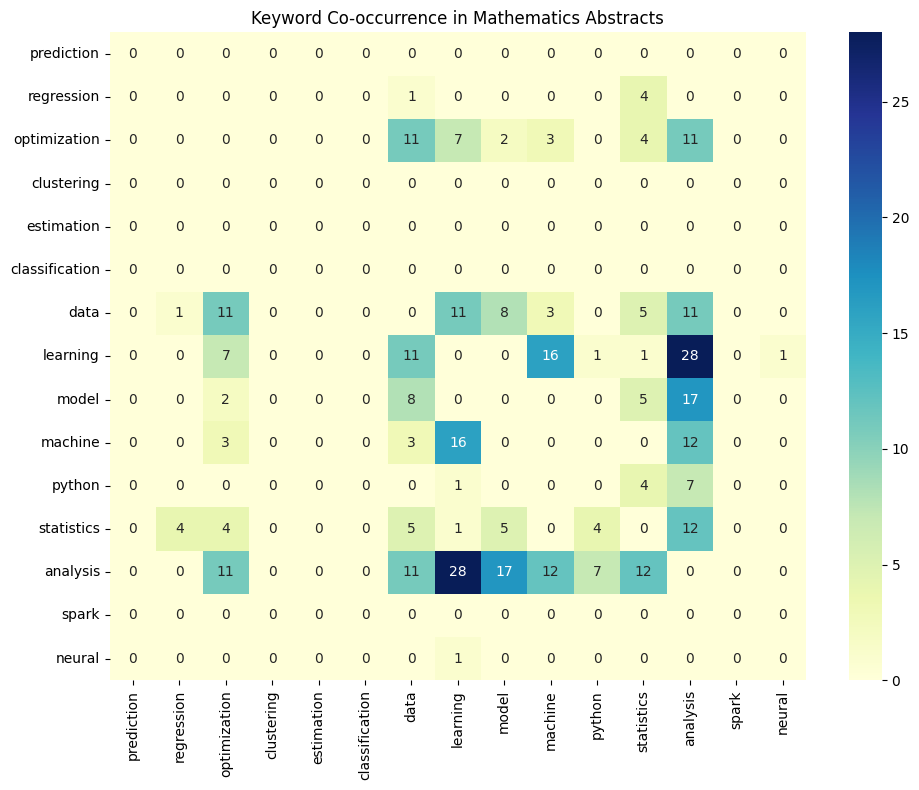


Analyzing keyword co-occurrence for subject: Statistics
Keyword co-occurrence matrix for Statistics:


,prediction,regression,optimization,clustering,estimation,classification,data,learning,model,machine,python,statistics,analysis,spark,neural
prediction,0,7,1,3,9,1,24,27,10,11,16,35,19,0,0
regression,7,0,2,19,74,5,284,86,83,28,18,200,174,0,1
optimization,1,2,0,0,2,1,16,7,2,5,0,16,10,0,1
clustering,3,19,0,0,10,2,22,17,13,5,7,13,10,0,0
estimation,9,74,2,10,0,0,96,62,89,25,17,102,65,0,2
classification,1,5,1,2,0,0,24,18,1,4,0,50,5,0,2
data,24,284,16,22,96,24,0,318,110,162,110,857,649,0,12
learning,27,86,7,17,62,18,318,0,72,167,74,363,162,0,11
model,10,83,2,13,89,1,110,72,0,20,0,87,110,0,0
machine,11,28,5,5,25,4,162,167,20,0,41,181,61,0,4


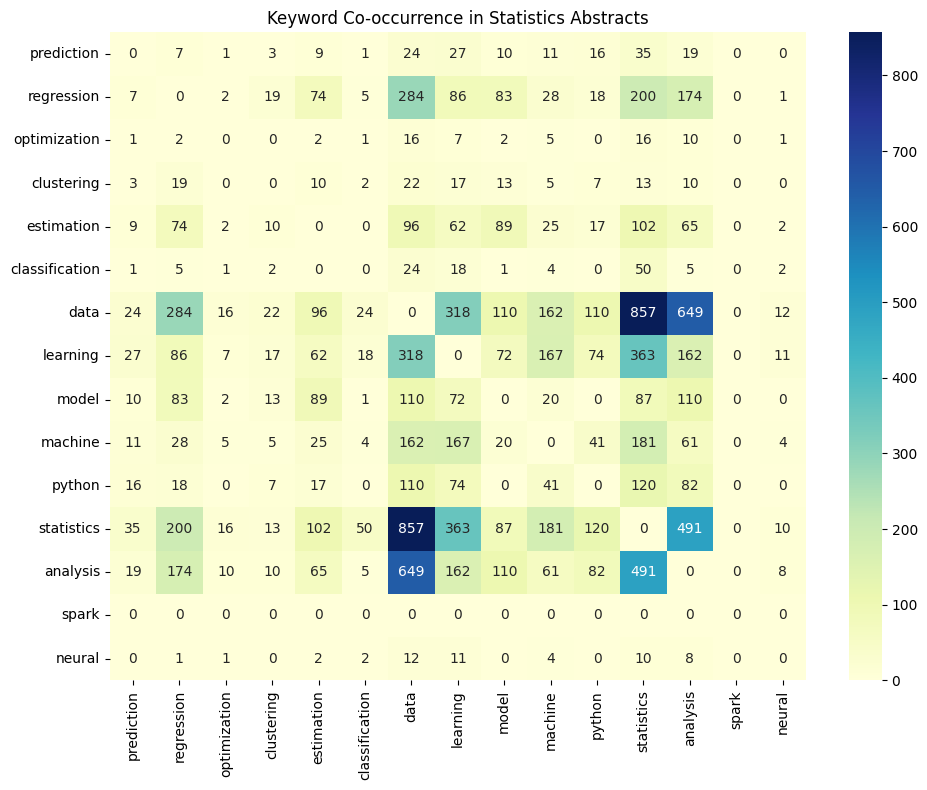


Analyzing keyword co-occurrence for subject: Computer Science
Keyword co-occurrence matrix for Computer Science:


,prediction,regression,optimization,clustering,estimation,classification,data,learning,model,machine,python,statistics,analysis,spark,neural
prediction,0,0,0,0,0,0,1,6,2,2,0,1,1,0,1
regression,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
optimization,0,0,0,0,0,0,2,4,7,3,6,0,3,0,5
clustering,0,0,0,0,0,1,8,4,0,2,0,1,2,0,0
estimation,0,0,0,0,0,1,0,0,0,0,3,0,0,0,1
classification,0,0,0,1,1,0,15,15,0,7,3,1,2,0,5
data,1,0,2,8,0,15,0,178,17,92,1,16,61,0,33
learning,6,0,4,4,0,15,178,0,13,123,4,10,56,0,54
model,2,0,7,0,0,0,17,13,0,6,1,3,10,0,2
machine,2,0,3,2,0,7,92,123,6,0,2,6,29,0,16


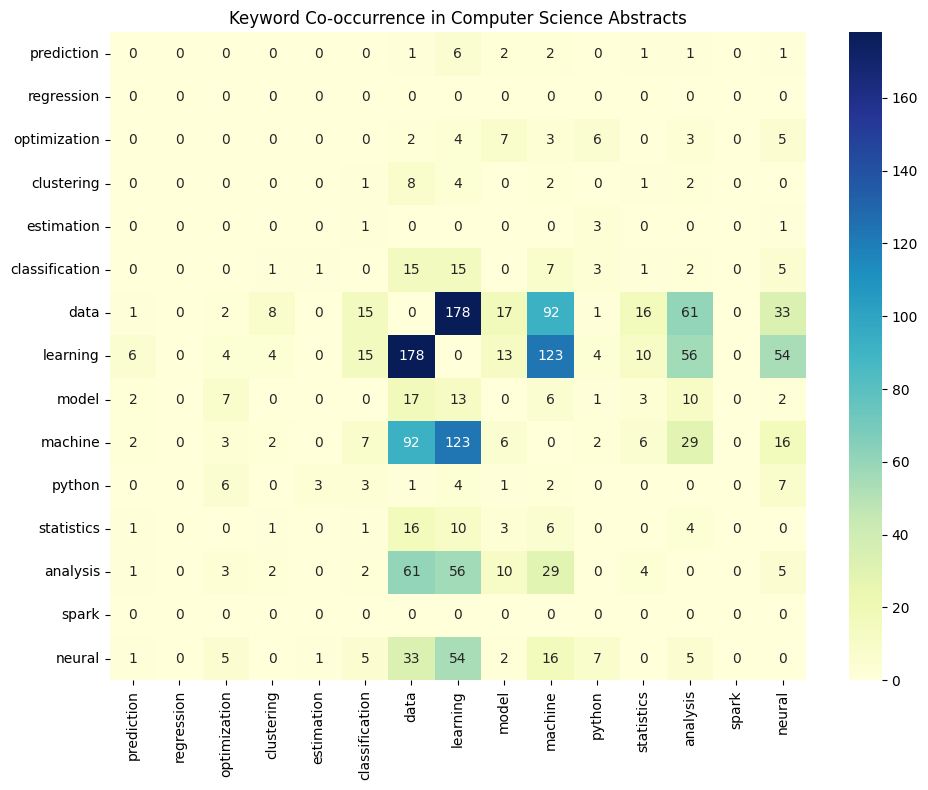


Number of books per subject:


,count
Subject,
Mathematics,270
Statistics,200
Data Science,156
Computer Science,152


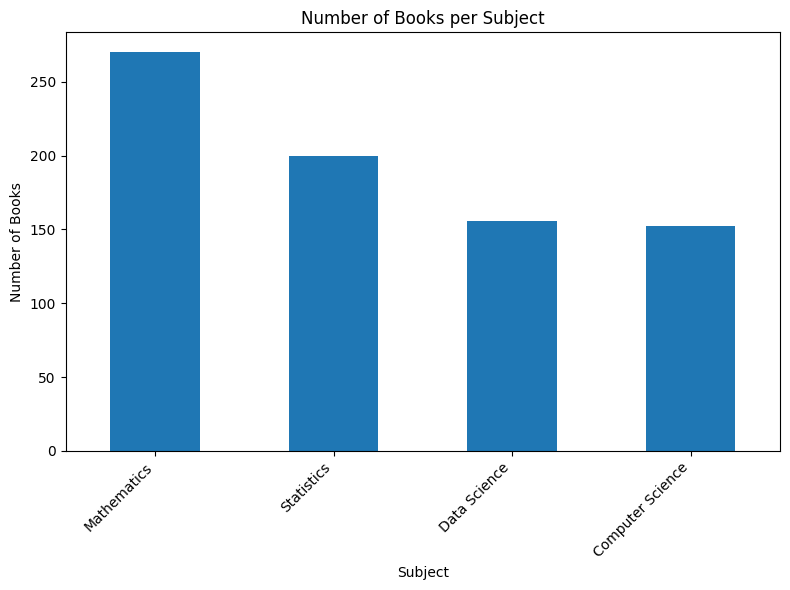


Top 5 keywords per subject:
Data Science: ['data', 'learning', 'machine', 'analysis', 'statistics']
Mathematics: ['learning', 'analysis', 'model', 'data', 'optimization']
Statistics: ['statistics', 'data', 'analysis', 'learning', 'regression']
Computer Science: ['data', 'learning', 'machine', 'analysis', 'model']


In [ ]:
# prompt: generate code for deeper analysis and to help me as I am using this to determine what data science really entails and how the other three are connected to data science

# Analyze keyword co-occurrence within each subject
# This can help understand which keywords appear together more often within a subject.

from sklearn.feature_extraction.text import TfidfVectorizer

for subject in target_subjects:
    print(f"\nAnalyzing keyword co-occurrence for subject: {subject}")
    subject_df = df[df["Subject"] == subject].copy()

    if subject_df.empty:
        print(f"No data found for subject: {subject}")
        continue

    # Use abstracts for the specific subject
    subject_abstracts_list = subject_df["Abstract"].dropna().astype(str).tolist()

    if not subject_abstracts_list:
        print(f"No non-empty abstracts found for subject: {subject}")
        continue

    # Use CountVectorizer to get token counts for co-occurrence analysis
    # Filter for the predefined keywords
    vectorizer = CountVectorizer(vocabulary=keywords)
    X = vectorizer.fit_transform(subject_abstracts_list)

    # Convert to a dense array for easier calculation
    X_dense = X.todense()

    # Calculate the co-occurrence matrix
    co_occurrence_matrix = (X_dense.T * X_dense)

    # Convert to DataFrame for better visualization
    co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=keywords, columns=keywords)

    # Remove the diagonal (word co-occurrence with itself)
    np.fill_diagonal(co_occurrence_df.values, 0)

    print(f"Keyword co-occurrence matrix for {subject}:")
    display(co_occurrence_df)

    # Optional: Visualize the co-occurrence matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(co_occurrence_df, annot=True, cmap="YlGnBu", fmt='d')
    plt.title(f"Keyword Co-occurrence in {subject} Abstracts")
    plt.tight_layout()
    plt.show()

# Analyze the distribution of books per subject
subject_counts = df["Subject"].value_counts()
print("\nNumber of books per subject:")
display(subject_counts)

plt.figure(figsize=(8, 6))
subject_counts.plot(kind='bar')
plt.title("Number of Books per Subject")
plt.xlabel("Subject")
plt.ylabel("Number of Books")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Further analysis: Look at the top keywords per subject and how they overlap
top_n = 5 # Define how many top keywords to consider

print(f"\nTop {top_n} keywords per subject:")
for subject in target_subjects:
    subject_df = df[df["Subject"] == subject].copy()

    if subject_df.empty:
        print(f"No data found for subject: {subject}")
        continue

    subject_abstracts = " ".join(subject_df["Abstract"].dropna().astype(str))
    cleaned_subject_text = re.sub(r'[^\w\s]', '', subject_abstracts.lower())

    subject_word_counts = Counter(cleaned_subject_text.split())

    subject_keyword_freq = {key: subject_word_counts.get(key, 0) for key in keywords}

    subject_keyword_summary_df = pd.DataFrame(list(subject_keyword_freq.items()), columns=["Keyword", "Total Mentions"])

    subject_keyword_summary_df = subject_keyword_summary_df.sort_values(by="Total Mentions", ascending=False)

    print(f"{subject}: {list(subject_keyword_summary_df['Keyword'].head(top_n))}")

In [ ]:
# # prompt: generate code to go into pdfs in a google drive and extract keywords

!pip install PyPDF2
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# import PyPDF2
# import re
# from collections import Counter

# # Define your keywords
# keywords = ['prediction', 'regression', 'optimization', 'clustering', 'estimation', 'classification',
#             'data', 'learning', 'model', 'machine', 'python', 'statistics', 'analysis', 'spark', 'neural']

# def extract_text_from_pdf(pdf_path):
#     """Extracts text from a PDF file."""
#     text = ""
#     try:
#         with open(pdf_path, 'rb') as f:
#             reader = PyPDF2.PdfReader(f)
#             for page_num in range(len(reader.pages)):
#                 page = reader.pages[page_num]
#                 text += page.extract_text() or "" # Handle potential None return from extract_text
#     except Exception as e:
#         print(f"Error reading {pdf_path}: {e}")
#         return None
#     return text

# def find_keywords_in_text(text, keywords):
#     """Finds and counts occurrences of keywords in a given text."""
#     if text is None:
#         return {}

#     # Clean and tokenize text
#     cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
#     word_counts = Counter(cleaned_text.split())

#     keyword_freq = {key: word_counts.get(key, 0) for key in keywords}
#     return keyword_freq

# def process_pdfs_in_drive(drive_folder_path, keywords):
#     """Iterates through PDFs in a Google Drive folder and extracts keyword frequencies."""
#     keyword_results = {}

#     for root, _, files in os.walk(drive_folder_path):
#         for file in files:
#             if file.lower().endswith('.pdf'):
#                 pdf_path = os.path.join(root, file)
#                 print(f"Processing: {pdf_path}")
#                 pdf_text = extract_text_from_pdf(pdf_path)
#                 if pdf_text:
#                     keyword_freq = find_keywords_in_text(pdf_text, keywords)
#                     keyword_results[file] = keyword_freq

#     return keyword_results

# # Specify the path to your folder in Google Drive
# # Replace 'My Drive/Your_PDF_Folder' with the actual path to your folder
# drive_folder = '/content/drive/MyDrive/Books PDFs'

# # Process the PDFs and get keyword frequencies
# pdf_keyword_frequencies = process_pdfs_in_drive(drive_folder, keywords)

# # Display the results
# print("\nKeyword frequencies in each PDF:")
# for pdf_file, freqs in pdf_keyword_frequencies.items():
#     print(f"\n--- {pdf_file} ---")
#     for keyword, count in freqs.items():
#         print(f"{keyword}: {count}")

# *****************************************************************************

# Step 1: Install required library
# !pip install PyPDF2

# Step 2: Mount your Google Drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# # Step 3: Import libraries
# import os
# import PyPDF2
# import re
# from collections import Counter
# import pandas as pd

# # Step 4: Define the keywords you're searching for
# keywords = [
#     'prediction', 'regression', 'optimization', 'clustering',
#     'estimation', 'classification', 'data', 'learning', 'model',
#     'machine', 'python', 'statistics', 'analysis', 'spark', 'neural'
# ]

# # Step 5: Helper functions
# def extract_text_from_pdf(pdf_path):
#     """Extracts text from a PDF file."""
#     text = ""
#     try:
#         with open(pdf_path, 'rb') as f:
#             reader = PyPDF2.PdfReader(f)
#             for page_num in range(len(reader.pages)):
#                 page = reader.pages[page_num]
#                 text += page.extract_text() or ""  # Handles None
#     except Exception as e:
#         print(f"❌ Error reading {pdf_path}: {e}")
#         return None
#     return text

# def find_keywords_in_text(text, keywords):
#     """Finds and counts keyword occurrences in a text."""
#     if text is None:
#         return {key: 0 for key in keywords}

#     cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
#     word_counts = Counter(cleaned_text.split())

#     return {key: word_counts.get(key, 0) for key in keywords}

# # Step 6: Analyze all PDFs in your folder
# def process_pdfs_in_drive(drive_folder_path, keywords):
#     keyword_results = {}

#     for root, _, files in os.walk(drive_folder_path):
#         for file in files:
#             if file.lower().endswith('.pdf'):
#                 pdf_path = os.path.join(root, file)
#                 print(f"📘 Processing: {file}")
#                 text = extract_text_from_pdf(pdf_path)
#                 if text:
#                     keyword_results[file] = find_keywords_in_text(text, keywords)
#                 else:
#                     print(f"⚠️ Skipping {file} due to unreadable content.")

#     return keyword_results

# # Step 7: Update this to your Drive folder path
# drive_folder = '/content/drive/MyDrive/Books PDFs'

# # Step 8: Run the processing
# pdf_keyword_frequencies = process_pdfs_in_drive(drive_folder, keywords)

# # Step 9: Convert results to DataFrame
# df = pd.DataFrame.from_dict(pdf_keyword_frequencies, orient='index')
# df.index.name = 'Book'
# df.reset_index(inplace=True)

# # Step 10: Save to CSV in Drive
# output_csv = '/content/drive/MyDrive/Books PDFs/keyword_frequencies.csv'
# df.to_csv(output_csv, index=False)
# print(f"\n✅ Keyword frequencies saved to: {output_csv}")

# # Step 11: (Optional) Highlight books containing the word 'prediction'
# print("\n📌 Books containing the word 'prediction':")
# for book, row in df.iterrows():
#     if row['prediction'] > 0:
#         print(f"- {row['Book']}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
# !pip install PyPDF2
# from google.colab import drive
# import os
# import PyPDF2
# import re
# import pandas as pd
# from collections import Counter

# # Mount Drive
# drive.mount('/content/drive')

# # Define your folder
# folder_path = '/content/drive/MyDrive/Books PDFs'  # ← Update if needed

# # Define your keywords
# keywords = ['prediction', 'regression', 'optimization', 'clustering', 'estimation', 'classification',
#             'data', 'learning', 'model', 'machine', 'python', 'statistics', 'analysis', 'spark', 'neural']

# # Store results
# results = []

# # Go through first N PDFs only (set N to 5, 10, etc. to avoid freezing)
# max_files = 10
# count = 0

# # Loop through PDFs
# for root, _, files in os.walk(folder_path):
#     for file in sorted(files):  # sorted so it's repeatable
#         if file.lower().endswith('.pdf'):
#             pdf_path = os.path.join(root, file)
#             print(f"🔍 Processing: {file}")
#             count += 1
#             if count > max_files:
#                 break

#             try:
#                 with open(pdf_path, 'rb') as f:
#                     reader = PyPDF2.PdfReader(f)
#                     text = ""
#                     for page in reader.pages[:5]:  # Only first 5 pages for speed
#                         text += page.extract_text() or ""

#                 # Clean and count
#                 words = re.findall(r'\b\w+\b', text.lower())
#                 word_freq = Counter(words)
#                 result = {'File Name': file}
#                 result.update({kw: word_freq.get(kw, 0) for kw in keywords})
#                 results.append(result)

#             except Exception as e:
#                 print(f"⚠️ Error with {file}: {e}")
#                 continue

# # Convert to DataFrame
# df = pd.DataFrame(results)

# # Save to Google Drive
# output_path = '/content/drive/MyDrive/pdf_keyword_summary.csv'
# df.to_csv(output_path, index=False)
# print(f"\n✅ Done! Results saved to: {output_path}")


In [ ]:
from google.colab import drive
from google.colab import auth
from google.auth import default
import gspread
from gspread_dataframe import set_with_dataframe
import os
import PyPDF2
import re
from collections import Counter
import pandas as pd # Import pandas
import signal # Import signal module
from contextlib import contextmanager # Import contextmanager

# Define a timeout function
@contextmanager
def timeout(time):
    # Register a handler for the SIGALRM signal
    signal.signal(signal.SIGALRM, raised_timeout_error)
    # Schedule an alarm after 'time' seconds
    signal.alarm(time)
    try:
        yield
    except TimeoutError:
        raise
    finally:
        # Cancel the alarm
        signal.signal(signal.SIGALRM, signal.SIG_IGN)

class TimeoutError(Exception):
    pass

def raised_timeout_error(signum, frame):
    raise TimeoutError("Function execution timed out")


# Mount Google Drive
drive.mount('/content/drive')

# Authenticate Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Define your folder path in Google Drive
# Replace 'Your PDF Folder' with the actual path to your folder
drive_folder_path = '/content/drive/MyDrive/Books PDFs'

# Define keywords that typically appear in an index
# You can expand this list based on common index entries in your PDFs
index_keywords = ['index', 'keywords', 'subject index', 'author index', 'glossary']

# Define the keywords to count frequency for (same as the ones used before)
keywords = ['prediction', 'regression', 'optimization', 'clustering', 'estimation', 'classification',
                          'data', 'learning', 'model', 'machine', 'python', 'statistics', 'analysis', 'spark', 'neural']

def extract_text_from_pdf(pdf_path, attempt_full_text=False):
    """
    Extracts text from a PDF file, focusing on potential index pages at the end
    or attempting to extract from the full text if requested.
    """
    text = ""
    try:
        # Set a timeout for PDF reading
        with timeout(60): # Increased timeout to 60 seconds
            with open(pdf_path, 'rb') as f:
                reader = PyPDF2.PdfReader(f)
                num_pages = len(reader.pages)

                if attempt_full_text:
                     print(f"Attempting to extract full text from {os.path.basename(pdf_path)}")
                     # Extract text from all pages
                     for page_num in range(num_pages):
                        page = reader.pages[page_num]
                        page_text = page.extract_text()
                        if page_text:
                           text += page_text + "\n"
                else:
                    # Heuristically check the last few pages (e.g., last 15 pages)
                    start_page = max(0, num_pages - 15) # Start checking from 15 pages before the end or page 0
                    print(f"Attempting to extract text from potential index pages ({start_page} to {num_pages-1}) from {os.path.basename(pdf_path)}")

                    for page_num in range(start_page, num_pages):
                        page = reader.pages[page_num]
                        page_text = page.extract_text()
                        if page_text:
                            # Optionally, you could first check if this page seems like an index
                            # if is_index_page(page_text, index_keywords):
                            text += page_text + "\n" # Add a newline to separate page content

            return text # Return text if successful
    except TimeoutError:
        print(f"Timeout reading {pdf_path}")
        return None
    except Exception as e:
        print(f"Error reading {pdf_path}: {e}")
        return None # Return None if an error occurs

def extract_potential_keywords_from_text(text, keywords):
    """
    Extracts and counts occurrences of predefined keywords in the given text.
    This function can be used for index text or full document text.
    """
    if text is None:
        return {key: 0 for key in keywords}

    cleaned_text = re.sub(r'[^\w\s]', '', text.lower())
    word_counts = Counter(cleaned_text.split())

    return {key: word_counts.get(key, 0) for key in keywords}


# Create or open a Google Doc (using Google Docs API or a simple text file)
# For simplicity, let's create a new Google Sheet to store the results
try:
    sh = gc.create('Book Keywords Index and Frequency')
    print(f"Created new Google Sheet: {'Book Keywords Index and Frequency'}")
except Exception as e:
    print(f"Could not create new sheet, trying to open existing one: {e}")
    try:
        sh = gc.open('Book Keywords Index and Frequency')
        print("Opened existing Google Sheet: Book Keywords Index and Frequency")
    except Exception as e:
         print(f"Could not open existing sheet: {e}")
         sh = None # Handle error if sheet cannot be created or opened

if sh:
    try:
        worksheet = sh.sheet1
        # Define headers including keywords
        headers = ['Book Title', 'Extracted Index Keywords'] + keywords
        # Add headers if the sheet is empty
        if not worksheet.get_all_values():
            worksheet.append_row(headers)
            print("Added headers to the sheet.")
    except Exception as e:
         print(f"Error accessing worksheet: {e}")
         worksheet = None # Handle error

# Process PDFs and write to Google Sheet
if worksheet:
    processed_data = []
    problematic_pdfs = [] # List to store problematic PDF filenames

    # Define the keywords to count frequency for (same as the ones used before)
    frequency_keywords = ['prediction', 'regression', 'optimization', 'clustering', 'estimation', 'classification',
                          'data', 'learning', 'model', 'machine', 'python', 'statistics', 'analysis', 'spark', 'neural']


    for root, _, files in os.walk(drive_folder_path):
        for file in files:
            if file.lower().endswith('.pdf'):
                pdf_path = os.path.join(root, file)
                book_title = os.path.splitext(file)[0] # Use filename as book title
                print(f"Processing: {book_title}")

                # First, try to extract text from potential index pages
                index_text = extract_text_from_pdf(pdf_path, attempt_full_text=False)
                extracted_index_keywords_list = []
                if index_text:
                    # Use the existing logic to extract potential index terms
                     # This regex is a simple starting point and might need refinement
                    # It looks for one or more word characters, potentially followed by spaces or hyphens,
                    # then a comma or space, followed by one or more digits (page numbers).
                    # We are primarily interested in the word part before the page number.
                    potential_keywords = set()
                    pattern = re.compile(r'(\b[\w\s-]+\b)[,\s]\d+', re.IGNORECASE)
                    matches = pattern.findall(index_text)

                    for match in matches:
                        # Clean up the extracted word/phrase
                        keyword = match.strip()
                        if keyword and len(keyword) > 1: # Avoid single-character entries
                            potential_keywords.add(keyword.lower())

                    # You might also consider splitting the text by lines and looking for lines
                    # that start with a word/phrase and end with a number or range of numbers.
                    lines = index_text.split('\n')
                    line_pattern = re.compile(r'^\s*([\w\s-]+?)\s*(\d+[\d,\s-]*)?\s*$', re.IGNORECASE)
                    for line in lines:
                        match = line_pattern.match(line.strip())
                        if match:
                            keyword_part = match.group(1).strip()
                            # Simple check: if the line contains a number, it might be an index entry
                            if any(char.isdigit() for char in line):
                                 if keyword_part and len(keyword_part) > 1:
                                    potential_keywords.add(keyword_part.lower())

                    extracted_index_keywords_list = sorted(list(potential_keywords))


                    print(f"Found {len(extracted_index_keywords_list)} potential index keywords for {book_title}")
                    index_keywords_str = ", ".join(extracted_index_keywords_list)

                    # Now, extract text from the *entire* document for keyword frequency counting
                    full_text = extract_text_from_pdf(pdf_path, attempt_full_text=True)
                    if full_text:
                         keyword_freq = extract_potential_keywords_from_text(full_text, frequency_keywords)
                         row_data = [book_title, index_keywords_str] + [keyword_freq.get(kw, 0) for kw in frequency_keywords]
                         processed_data.append(row_data)
                    else:
                         # Handle case where full text extraction also fails
                         row_data = [book_title, index_keywords_str] + ["Error extracting full text"] * len(frequency_keywords)
                         processed_data.append(row_data)
                         problematic_pdfs.append(file) # Add to problematic list for full text extraction failure
                         print(f"Could not extract full text for {book_title} (added to problematic list)")


                else:
                    # If index text extraction failed, try extracting full text
                    print(f"No index text extracted for {book_title}. Attempting full text extraction.")
                    full_text = extract_text_from_pdf(pdf_path, attempt_full_text=True)

                    if full_text:
                         keyword_freq = extract_potential_keywords_from_text(full_text, frequency_keywords)
                         row_data = [book_title, "No index found or extracted"] + [keyword_freq.get(kw, 0) for kw in frequency_keywords]
                         processed_data.append(row_data)
                         print(f"Successfully extracted full text and counted keywords for {book_title}")
                    else:
                         # Handle case where full text extraction also fails
                         row_data = [book_title, "Error extracting index and full text"] + ["Error extracting full text"] * len(frequency_keywords)
                         processed_data.append(row_data)
                         problematic_pdfs.append(file) # Add to problematic list for full text extraction failure
                         print(f"Could not extract full text for {book_title} (added to problematic list)")


    # Convert the list of lists to a DataFrame for easier handling
    results_df = pd.DataFrame(processed_data, columns=headers)

    # Append the DataFrame to the Google Sheet
    try:
        # Use set_with_dataframe to write the data, starting from the row after headers
        # Or use append_rows if you prefer appending without pandas
        # worksheet.append_rows(processed_data) # Use this if not using pandas
        # Clear existing data before writing if you want to overwrite each time
        # worksheet.clear()
        # worksheet.append_row(['Book Title', 'Extracted Keywords']) # Add headers again if cleared
        set_with_dataframe(worksheet, results_df, row=1, include_index=False, include_column_header=True) # Write from row 1 with headers
        print(f"\nSuccessfully wrote keyword data for {len(processed_data)} books to Google Sheet.")
    except Exception as e:
        print(f"\nError writing data to Google Sheet: {e}")
else:
    print("\nCould not write to Google Sheet. Please check permissions and sheet access.")

# Print the list of problematic PDFs
if problematic_pdfs:
    print("\n--- Problematic PDFs (skipped or had extraction issues) ---")
    for pdf_name in problematic_pdfs:
        print(f"- {pdf_name}")
else:
    print("\nNo problematic PDFs encountered during processing.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Created new Google Sheet: Book Keywords Index and Frequency
Processing: Applied Data Science Using PySpark (1)
Attempting to extract text from potential index pages (447 to 461) from Applied Data Science Using PySpark (1).pdf
Found 20 potential index keywords for Applied Data Science Using PySpark (1)
Attempting to extract full text from Applied Data Science Using PySpark (1).pdf
Processing: Learn Data Science Using Python
Attempting to extract text from potential index pages (175 to 189) from Learn Data Science Using Python.pdf
Found 40 potential index keywords for Learn Data Science Using Python
Attempting to extract full text from Learn Data Science Using Python.pdf
Processing: Data Science Solutions on Azure (1)
Attempting to extract text from potential index pages (279 to 293) from Data Science Solutions on Azure (1).pdf
Found 27 potential index keywords

Processing: 978-3-031-69622-0
Attempting to extract text from potential index pages (245 to 259) from 978-3-031-69622-0.pdf
Found 90 potential index keywords for 978-3-031-69622-0
Attempting to extract full text from 978-3-031-69622-0.pdf
Processing: 978-981-97-2592-2
Attempting to extract text from potential index pages (138 to 152) from 978-981-97-2592-2.pdf
Found 123 potential index keywords for 978-981-97-2592-2
Attempting to extract full text from 978-981-97-2592-2.pdf
Processing: 978-3-031-39791-2
Attempting to extract text from potential index pages (241 to 255) from 978-3-031-39791-2.pdf
Found 100 potential index keywords for 978-3-031-39791-2
Attempting to extract full text from 978-3-031-39791-2.pdf
Processing: 978-3-031-41713-9
Attempting to extract text from potential index pages (320 to 334) from 978-3-031-41713-9.pdf
Found 44 potential index keywords for 978-3-031-41713-9
Attempting to extract full text from 978-3-031-41713-9.pdf
Processing: 978-3-031-66253-9
Attempting t

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.2 MB/s eta 0:00:00


# Task
Generate Python code to perform various analyses and visualizations on the `results_df` DataFrame, which contains book titles and extracted keywords. The analyses should include overall keyword frequency, most relevant keywords per book, filtering books by keyword, and keyword co-occurrence analysis. Also, generate code for powerful and interactive visualizations of these analyses.

## Overall keyword frequency analysis

### Subtask:
Calculate and visualize the total frequency of each keyword across all books in the `results_df` DataFrame.


**Reasoning**:
Sum the keyword frequency columns, convert to a DataFrame, sort, and display the overall keyword frequencies. Then, create a bar plot to visualize the overall keyword frequencies.



In [ ]:
# Sum the keyword frequency columns
overall_keyword_freq = results_df[keywords].sum()

# Convert the Series to a DataFrame
overall_keyword_freq_df = overall_keyword_freq.reset_index()
overall_keyword_freq_df.columns = ["Keyword", "Total Frequency"]

# Sort by Total Frequency
overall_keyword_freq_df = overall_keyword_freq_df.sort_values(by="Total Frequency", ascending=False)

# Print the sorted DataFrame
print("Overall Keyword Frequency Across All Books:")
display(overall_keyword_freq_df)

# Create a bar plot of the total keyword frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x="Keyword", y="Total Frequency", data=overall_keyword_freq_df)
plt.xticks(rotation=45, ha="right")
plt.title("Overall Keyword Frequency Across All Books")
plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

**Reasoning**:
The previous code failed because some columns in the `results_df` DataFrame were not numeric, specifically the 'Extracted Index Keywords' column which contains strings. I need to select only the numeric keyword columns before attempting to sum them.



In [ ]:
# Select only the keyword columns for summation, ensuring they are numeric
keyword_columns = results_df[keywords]

# Sum the keyword frequency columns, converting to numeric and handling potential errors
overall_keyword_freq = keyword_columns.apply(pd.to_numeric, errors='coerce').sum()

# Convert the Series to a DataFrame
overall_keyword_freq_df = overall_keyword_freq.reset_index()
overall_keyword_freq_df.columns = ["Keyword", "Total Frequency"]

# Sort by Total Frequency
overall_keyword_freq_df = overall_keyword_freq_df.sort_values(by="Total Frequency", ascending=False)

# Print the sorted DataFrame
print("Overall Keyword Frequency Across All Books:")
display(overall_keyword_freq_df)

# Create a bar plot of the total keyword frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x="Keyword", y="Total Frequency", data=overall_keyword_freq_df)
plt.xticks(rotation=45, ha="right")
plt.title("Overall Keyword Frequency Across All Books")
plt.tight_layout()
plt.show()

Overall Keyword Frequency Across All Books:


,Keyword,Total Frequency
6,data,268277.0
8,model,117776.0
7,learning,100839.0
12,analysis,76134.0
11,statistics,44094.0
1,regression,39156.0
9,machine,27739.0
0,prediction,15019.0
4,estimation,14983.0
14,neural,14563.0


NameError: name 'plt' is not defined

**Reasoning**:
The previous code block failed because the `plt` object from matplotlib was not defined in the current scope. I need to import `matplotlib.pyplot` and `seaborn` to generate the plot.



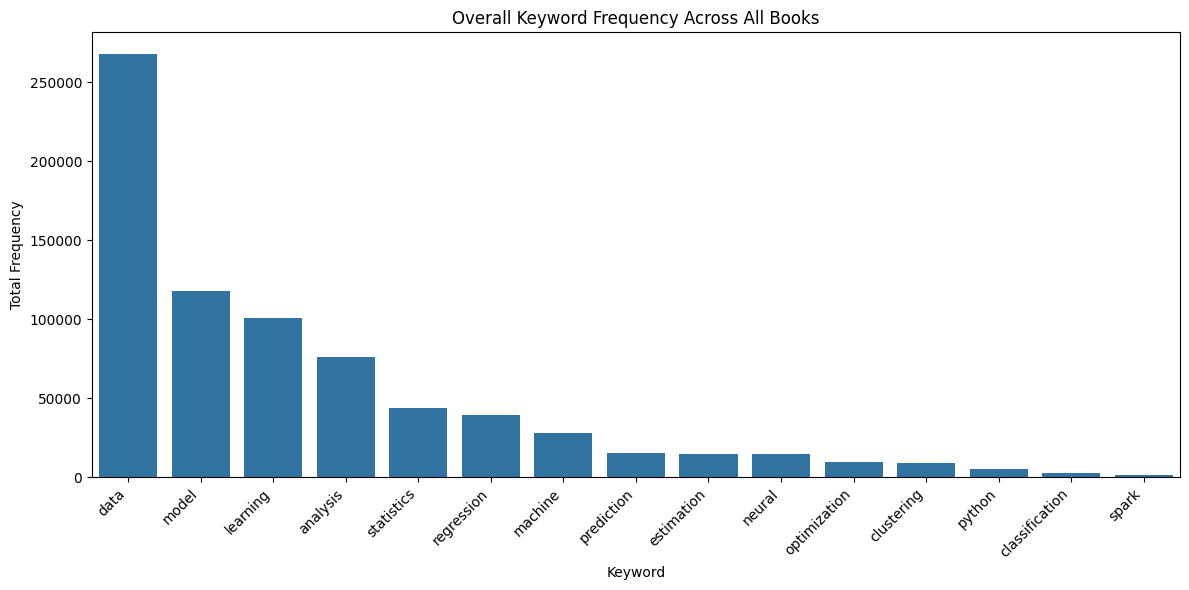

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the total keyword frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x="Keyword", y="Total Frequency", data=overall_keyword_freq_df)
plt.xticks(rotation=45, ha="right")
plt.title("Overall Keyword Frequency Across All Books")
plt.tight_layout()
plt.show()

## Most relevant keywords per book

### Subtask:
Generate code to display the top N keywords for a selected book from the `results_df`.


**Reasoning**:
Filter the dataframe for the selected book, extract keyword frequencies, sort them, and display the top N.



In [ ]:
# Choose a book title and define N
selected_book_title = 'Learn Data Science Using Python'
top_n = 10

# Filter the DataFrame for the selected book
selected_book_df = results_df[results_df['Book Title'] == selected_book_title]

if selected_book_df.empty:
    print(f"No data found for the book title: {selected_book_title}")
else:
    # Extract keyword frequency columns for the selected book
    # We need to drop the 'Book Title' and 'Extracted Index Keywords' columns to get only keyword counts
    keyword_columns_only = selected_book_df.drop(columns=['Book Title', 'Extracted Index Keywords'])

    # Transpose the DataFrame to get keywords as rows and frequency as a column
    keyword_freq_series = keyword_columns_only.iloc[0]

    # Sort the keywords by frequency in descending order
    sorted_keyword_freq = keyword_freq_series.sort_values(ascending=False)

    # Select the top N keywords
    top_n_keywords = sorted_keyword_freq.head(top_n)

    # Display the top N keywords and their frequencies
    print(f"Top {top_n} keywords for '{selected_book_title}':")
    display(top_n_keywords)

Top 10 keywords for 'Learn Data Science Using Python':


,1
data,348
python,92
analysis,73
regression,58
model,58
statistics,32
prediction,12
learning,8
machine,7
classification,3


## Filter books by keyword

### Subtask:
Generate code to filter and display books that contain a specified keyword above a certain frequency threshold.


**Reasoning**:
Define the target keyword and frequency threshold, then filter the DataFrame and display the results.



In [ ]:
# 1. Define the target keyword and minimum frequency threshold
target_keyword = 'data'
min_frequency = 100

# 2. Filter the results_df DataFrame
filtered_books_df = results_df[results_df[target_keyword] >= min_frequency].copy()

# Select only the 'Book Title' and the target keyword column for display
filtered_books_display_df = filtered_books_df[['Book Title', target_keyword]]

# 3. Display the filtered DataFrame
print(f"Books containing '{target_keyword}' with frequency >= {min_frequency}:")
display(filtered_books_display_df)

TypeError: '>=' not supported between instances of 'str' and 'int'

**Reasoning**:
The error indicates that the keyword frequency column is of object type (likely containing strings) and cannot be directly compared with an integer. I need to convert the keyword frequency column to a numeric type before filtering.



In [ ]:
# 1. Define the target keyword and minimum frequency threshold
target_keyword = 'data'
min_frequency = 100

# Convert the target keyword column to numeric, coercing errors to NaN and then filling NaN with 0
results_df[target_keyword] = pd.to_numeric(results_df[target_keyword], errors='coerce').fillna(0)

# 2. Filter the results_df DataFrame
filtered_books_df = results_df[results_df[target_keyword] >= min_frequency].copy()

# Select only the 'Book Title' and the target keyword column for display
filtered_books_display_df = filtered_books_df[['Book Title', target_keyword]]

# 3. Display the filtered DataFrame
print(f"Books containing '{target_keyword}' with frequency >= {min_frequency}:")
display(filtered_books_display_df)

Books containing 'data' with frequency >= 100:


,Book Title,data
0,Applied Data Science Using PySpark (1),770.0
1,Learn Data Science Using Python,348.0
2,Data Science Solutions on Azure (1),283.0
3,Thinking Data Science,617.0
4,Frontiers of Statistics and Data Science (1),490.0
...,...,...
606,978-3-030-43412-0,453.0
607,978-1-0716-1418-1,1674.0
608,978-981-15-8210-3,654.0
609,978-3-030-25081-2,199.0


## Keyword co-occurrence analysis (across books)

### Subtask:
Analyze and visualize which keywords tend to appear together in the same books within the `results_df`.


**Reasoning**:
Select keyword columns, calculate co-occurrence matrix, convert to DataFrame, remove diagonal, and display.



In [ ]:
# Select only the keyword frequency columns
# Assuming the first two columns are 'Book Title' and 'Extracted Index Keywords'
keyword_columns = results_df[keywords].copy()

# Convert keyword columns to numeric, coercing errors to NaN, and fill NaN with 0
for col in keywords:
    keyword_columns[col] = pd.to_numeric(keyword_columns[col], errors='coerce').fillna(0)

# Create a co-occurrence matrix
# The dot product of the transposed keyword DataFrame and the original keyword DataFrame
co_occurrence_matrix = keyword_columns.T.dot(keyword_columns)

# Convert the matrix to a DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=keywords, columns=keywords)

# Remove the diagonal values
np.fill_diagonal(co_occurrence_df.values, 0)

# Display the co-occurrence matrix DataFrame
print("Keyword Co-occurrence Matrix:")
display(co_occurrence_df)

# Create a heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_df, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Keyword Co-occurrence in Books")
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

**Reasoning**:
The previous code block failed because `np` (numpy) was not imported. I need to import numpy and regenerate the code block.



Keyword Co-occurrence Matrix:


,prediction,regression,optimization,clustering,estimation,classification,data,learning,model,machine,python,statistics,analysis,spark,neural
prediction,0.0,2561170.0,642498.0,778063.0,879722.0,105062.0,14295716.0,5084969.0,6860339.0,2547384.0,190662.0,1420911.0,3714606.0,39676.0,1479030.0
regression,2561170.0,0.0,737756.0,1195022.0,2770016.0,181355.0,29768637.0,5510324.0,18638288.0,2517923.0,431518.0,5862299.0,10136707.0,66660.0,1667780.0
optimization,642498.0,737756.0,0.0,375700.0,409659.0,36922.0,6781006.0,2370076.0,3328434.0,1088426.0,78088.0,561154.0,1807508.0,25056.0,701066.0
clustering,778063.0,1195022.0,375700.0,0.0,408418.0,76803.0,11337528.0,3496372.0,4008477.0,1416967.0,113763.0,790134.0,2712755.0,38807.0,975294.0
estimation,879722.0,2770016.0,409659.0,408418.0,0.0,39426.0,10221239.0,2174591.0,6568737.0,900827.0,91469.0,2710570.0,3435572.0,8303.0,608565.0
classification,105062.0,181355.0,36922.0,76803.0,39426.0,0.0,2460099.0,579976.0,636185.0,257465.0,71546.0,122484.0,334443.0,47645.0,117258.0
data,14295716.0,29768637.0,6781006.0,11337528.0,10221239.0,2460099.0,0.0,69926576.0,88563384.0,29918139.0,4489820.0,33079811.0,59112380.0,2785271.0,14719386.0
learning,5084969.0,5510324.0,2370076.0,3496372.0,2174591.0,579976.0,69926576.0,0.0,30309683.0,11553197.0,968982.0,8074287.0,22220992.0,371205.0,6922215.0
model,6860339.0,18638288.0,3328434.0,4008477.0,6568737.0,636185.0,88563384.0,30309683.0,0.0,10491989.0,1155961.0,12233889.0,25830556.0,526948.0,6275542.0
machine,2547384.0,2517923.0,1088426.0,1416967.0,900827.0,257465.0,29918139.0,11553197.0,10491989.0,0.0,527030.0,1704296.0,5886851.0,228325.0,2722788.0


ValueError: Unknown format code 'd' for object of type 'float'

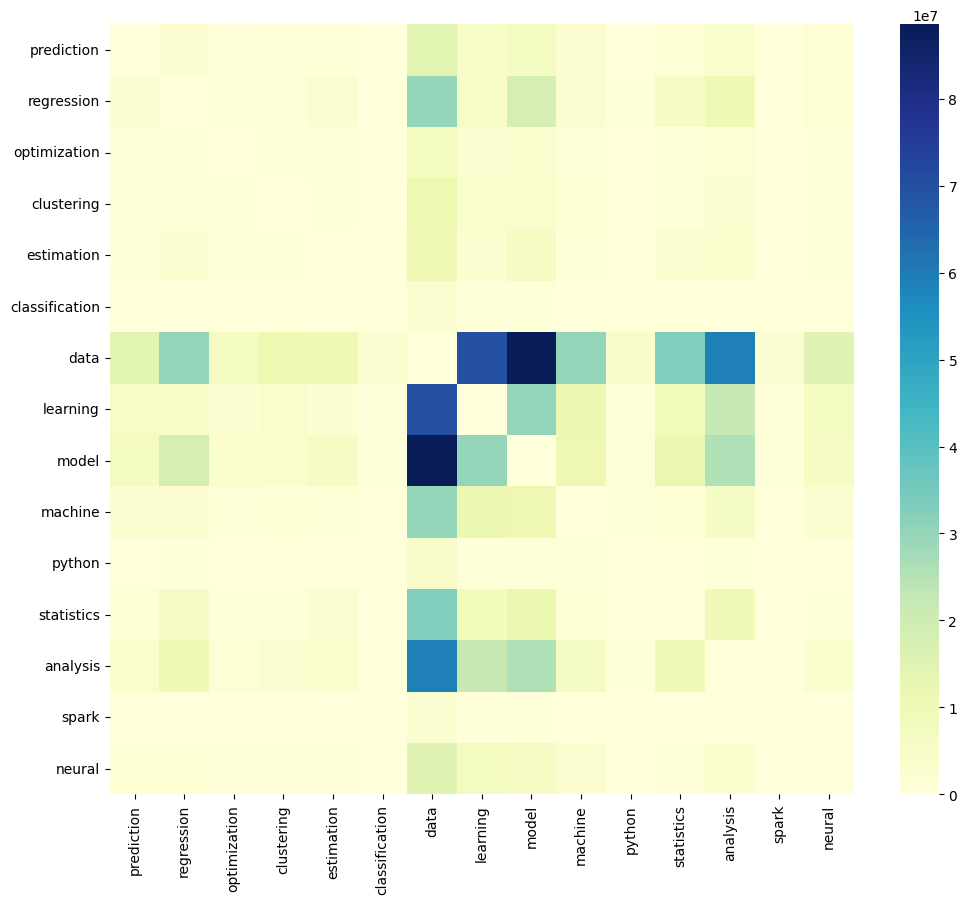

In [ ]:
import numpy as np

# Select only the keyword frequency columns
# Assuming the first two columns are 'Book Title' and 'Extracted Index Keywords'
keyword_columns = results_df[keywords].copy()

# Convert keyword columns to numeric, coercing errors to NaN, and fill NaN with 0
for col in keywords:
    keyword_columns[col] = pd.to_numeric(keyword_columns[col], errors='coerce').fillna(0)

# Create a co-occurrence matrix
# The dot product of the transposed keyword DataFrame and the original keyword DataFrame
co_occurrence_matrix = keyword_columns.T.dot(keyword_columns)

# Convert the matrix to a DataFrame
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=keywords, columns=keywords)

# Remove the diagonal values
np.fill_diagonal(co_occurrence_df.values, 0)

# Display the co-occurrence matrix DataFrame
print("Keyword Co-occurrence Matrix:")
display(co_occurrence_df)

# Create a heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_df, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Keyword Co-occurrence in Books")
plt.tight_layout()
plt.show()

**Reasoning**:
The heatmap visualization failed because the format code 'd' is for integers, but the co-occurrence matrix contains float values. I need to change the format code to handle floats, for example, '0.0f' or '.0f'.



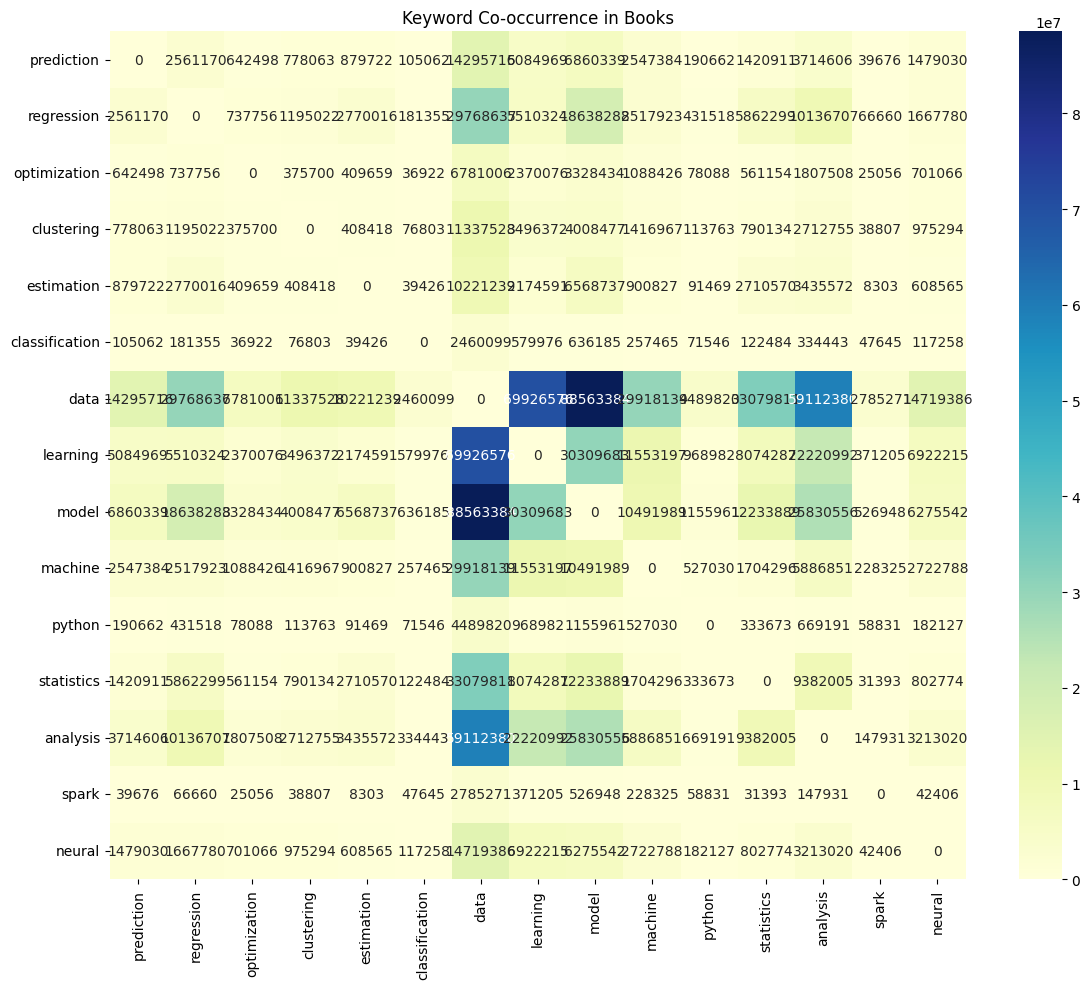

In [ ]:
# Create a heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_df, annot=True, cmap="YlGnBu", fmt='.0f') # Changed fmt to '.0f' for floats
plt.title("Keyword Co-occurrence in Books")
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The overall keyword frequency analysis revealed the total count of each keyword across all books and was visualized using a bar plot.
*   The analysis of the most relevant keywords per book successfully identified and displayed the top N keywords for a specific book ('Learn Data Science Using Python'), along with their frequencies.
*   Filtering books by keyword allowed for the identification of books where a specified keyword ('data') appeared above a certain frequency threshold (100), displaying the relevant book titles and counts.
*   The keyword co-occurrence analysis calculated a matrix showing how often pairs of keywords appeared together in the same book. This relationship was visualized using a heatmap, indicating which keywords are most frequently associated.

### Insights or Next Steps

*   The co-occurrence heatmap provides valuable insights into keyword relationships, suggesting potential thematic clusters or related concepts within the book dataset. Further analysis could explore clustering algorithms based on this co-occurrence data to group books by content.
*   The filtering capability can be used to identify books relevant to specific topics based on keyword frequency, which could be useful for recommendations or content curation.


# Documentation of Analysis Steps

This notebook performs an analysis of book abstracts and, additionally, extracts keywords from PDF documents stored in Google Drive to understand the prevalence and co-occurrence of specific keywords related to data science and related fields.

## 1. Initial Data Loading and Analysis

- Loaded the book data from an Excel file (`Final_Books.xlsx`) into a pandas DataFrame.
- Dropped rows with missing abstracts to ensure data quality for text analysis.
- Combined all abstracts into a single text string.
- Cleaned the combined text by converting to lowercase and removing punctuation.
- Defined a list of target keywords (`keywords`).
- Calculated the frequency of each keyword in the combined text using `collections.Counter`.
- Generated a word cloud visualization of the keyword frequencies.
- Counted the number of books each keyword appears in and created a summary DataFrame (`keyword_summary_df`).
- Displayed the overall keyword frequency summary table.
- Created a bar plot to visualize the overall keyword frequencies across all abstracts.

## 2. Subject-Specific Keyword Analysis

- Defined a list of target subjects: 'Data Science', 'Mathematics', 'Statistics', and 'Computer Science'.
- Iterated through each target subject.
- For each subject:
    - Filtered the main DataFrame to include only books belonging to the current subject.
    - Combined and cleaned the abstracts for the subject's books.
    - Calculated the frequency of the predefined keywords within the subject's abstracts.
    - Created and displayed a DataFrame summarizing the keyword frequencies for the subject.
    - Generated a bar plot to visualize the keyword frequencies specific to the subject.

## 3. Keyword Frequency Comparison Across Subjects

- Prepared data for combined plotting by iterating through each subject and calculating keyword frequencies.
- Concatenated the subject-specific keyword frequency DataFrames into a single DataFrame (`combined_keyword_freq_df`).
- Created a single grouped bar chart to visually compare the frequency of each keyword across the four target subjects.

## 4. Deeper Analysis: Keyword Co-occurrence within Subjects and Book Distribution

- Analyzed keyword co-occurrence within each subject using `CountVectorizer` to create a co-occurrence matrix.
- Visualized the co-occurrence matrices for each subject using heatmaps to show which keywords frequently appear together in abstracts within that subject.
- Analyzed the distribution of books across the defined subjects by counting the number of books per subject and visualizing it with a bar plot.
- Identified and displayed the top N (defined as 5) keywords for each subject to highlight the most prominent terms in each field.

## 5. Keyword Extraction from PDFs in Google Drive

- Installed the `PyPDF2` library for reading PDF files.
- Mounted Google Drive to access PDF files stored in a specified folder (`/content/drive/MyDrive/Books PDFs`).
- Implemented a function to extract text from PDF files, with an attempt to focus on potential index pages at the end of the document first, and then falling back to full text extraction if the initial attempt did not yield sufficient content. A timeout was added to prevent processing issues with large or complex PDFs.
- Implemented a function to find and count the occurrences of the predefined keywords within the extracted text.
- Authenticated with Google Sheets using `gspread` to store the results.
- Created a new Google Sheet named 'Book Keywords Index and Frequency' or opened it if it already existed.
- Processed each PDF file in the specified Google Drive folder:
    - Extracted text using the `extract_text_from_pdf` function.
    - Attempted to identify potential index keywords from the extracted text based on a simple pattern (word followed by page numbers).
    - Extracted text from the full document to count the frequency of the predefined keywords.
    - Stored the book title, extracted potential index keywords, and keyword frequencies in a list (`processed_data`).
    - Kept track of problematic PDFs that could not be processed.
- Converted the `processed_data` list into a pandas DataFrame (`results_df`).
- Wrote the `results_df` DataFrame to the Google Sheet using `gspread_dataframe`.
- Printed a list of any problematic PDFs encountered during processing.

## 6. Analysis and Visualization of PDF Keyword Data

- Performed various analyses and visualizations on the `results_df` DataFrame obtained from PDF processing:
    - **Overall keyword frequency:** Calculated and visualized the total frequency of each keyword across all processed PDF books using a bar plot.
    - **Most relevant keywords per book:** Generated code to display the top N keywords for a selected book from the `results_df`.
    - **Filter books by keyword:** Generated code to filter and display books that contain a specified keyword above a certain frequency threshold.
    - **Keyword co-occurrence analysis (across books):** Analyzed and visualized which keywords tend to appear together in the same books within the `results_df` by calculating a co-occurrence matrix and displaying it as a heatmap.